<a href="https://colab.research.google.com/github/CharmStrange/CoLab_data/blob/main/ipynb-majoring/DS/%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%95_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1차 프로젝트 - 웹 스크래핑
## `농산물 도매 시세` 데이터 추출, 인사이트 뽑고 데이터 시각화하기

- 매일 아침 가락동 농수산물 도매시장에서 경매 거래되는 주요 농산물들의 가격(시세) 정보 기록되는 웹 사이트

---

### 질문 - ***평균 농산물 도매 시세 차이는 농작물 재배 조건이나 외부 환경 영향을 때문인가?***

#### 가설 : 평균 농산물 도매 시세가 높은 것들은 재배하기 까다로운 작물일 것이다.

개발자 모드를 켜고 찾고 싶은 항목의 태그를 알아본다.
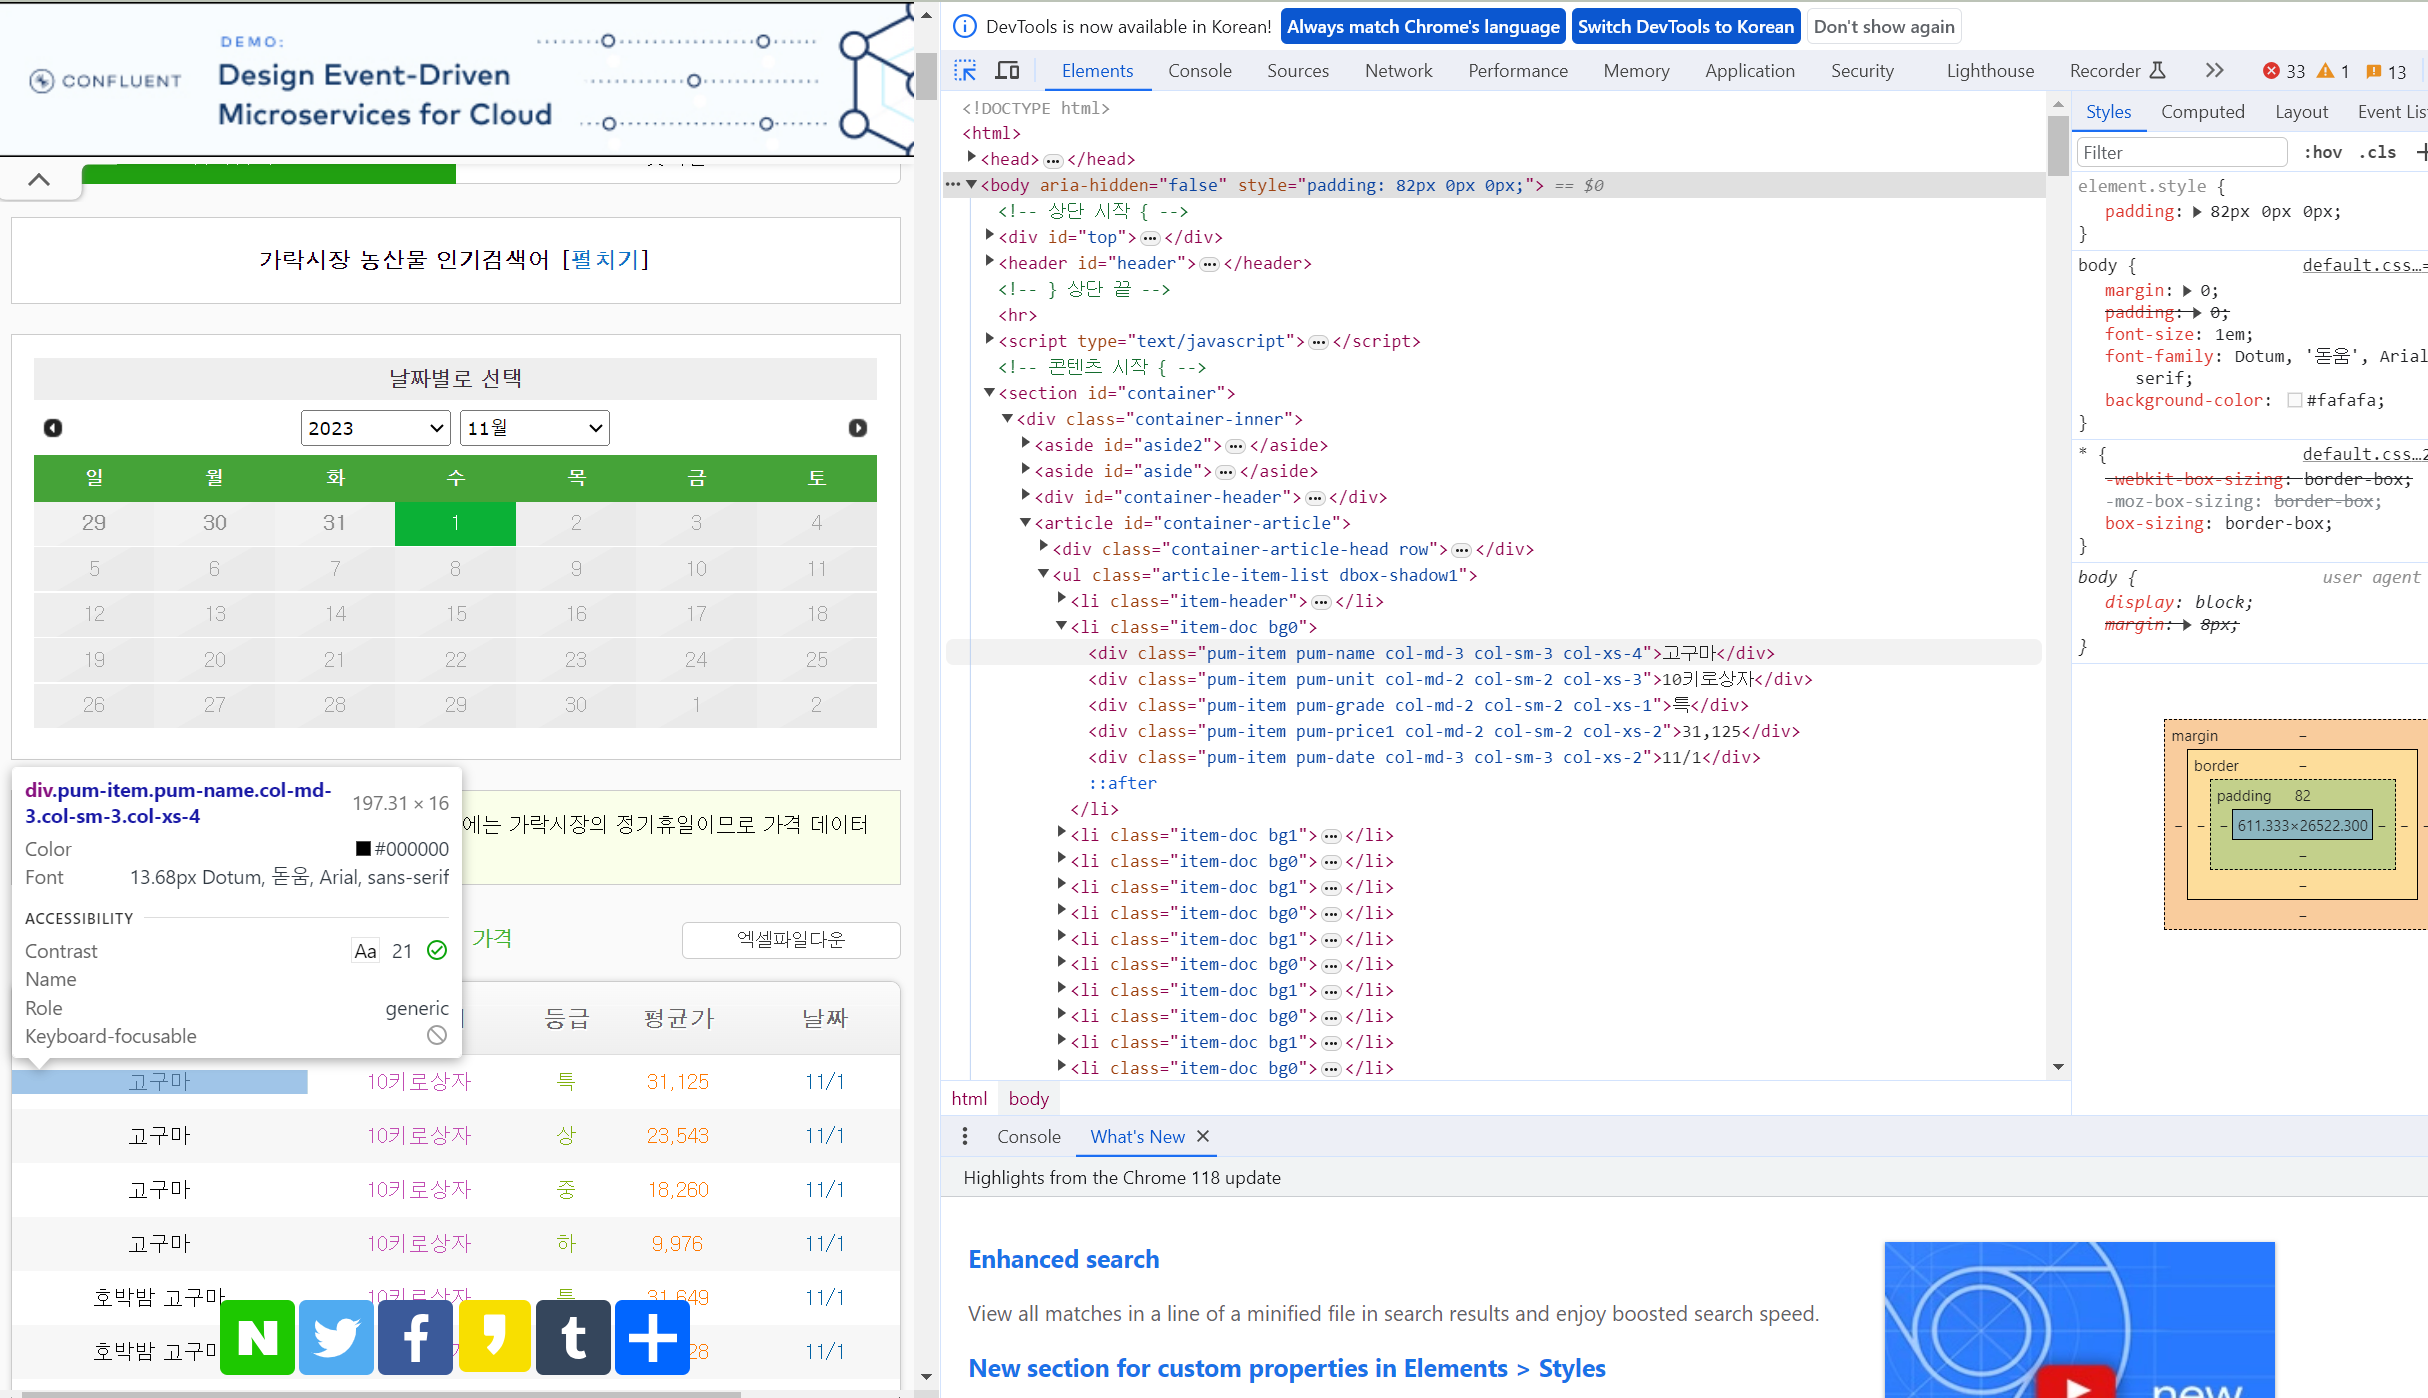

자세히 보니 `li` 태그에 `div` 태그로 묶인 데이터를 볼 수 있다. 이제 여기서 필요한 항목만 추출한다. 이 때 태그의 클래스를 사용해 항목을 추출한다. 필요한 항목의 클래스는 `pum-item pum-name col-md-3 col-sm-3 col-xs-4`, `pum-item pum-price1 col-md-2 col-sm-2 col-xs-2` 이다.

In [ ]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd

url = "https://www.garakprice.com/"
response = requests.get(url)
soup = BS(response.text, 'html.parser')
result = soup.find_all('li', ['item-doc bg0', 'item-doc bg1'])

data = []

for elements in result:
    item_data = []
    for each_element in elements.find_all('div', ['pum-item pum-name col-md-3 col-sm-3 col-xs-4', 'pum-item pum-price1 col-md-2 col-sm-2 col-xs-2']):
        item_data.append(each_element.text.strip())
    data.append(item_data)

max_columns = max(len(item) for item in data)

for item_data in data:
    while len(item_data) < max_columns:
        item_data.append(None)

df = pd.DataFrame(data)
df.columns = ['상품', '평균 가격']
df

,상품,평균 가격
0,고구마,"32,753"
1,고구마,"24,368"
2,고구마,"17,731"
3,고구마,"8,779"
4,호박밤 고구마,"30,027"
...,...,...
651,그린키위 국산,"18,556"
652,무화과 국산,"6,971"
653,무화과 국산,"5,094"
654,무화과 국산,"3,496"


---

중복되는 `상품` 때문에 데이터 정리를 해 주어야 한다.

데이터 정리 목적에 맞게, 같은 `상품` 명을 지닌 것들의 `평균 가격` 의 평균 가격을 내어 전체 데이터의 중복 제거를 해 줄 것이다,

In [ ]:
df['평균 가격'] = df['평균 가격'].str.replace(',', '').astype(float)

print( f"전체 데이터 길이 : {len(df)}, \n중복 제거 데이터 길이 : {len(df['상품'].unique())}" )

result_df = df.groupby('상품')['평균 가격'].mean().reset_index()

print( f"데이터 정리 후 전체 데이터 길이 : {len(result_df)}" )

result_df

전체 데이터 길이 : 656, 
중복 제거 데이터 길이 : 150
데이터 정리 후 전체 데이터 길이 : 150


,상품,평균 가격
0,가시오이,12883.000000
1,가지,12856.000000
2,감 대봉시,23272.083333
3,감 약시,15783.250000
4,감귤,12703.181818
...,...,...
145,호랑이콩,24075.666667
146,호박 고구마,21170.000000
147,호박밤 고구마,20166.000000
148,홍고추,56094.750000


---

##### 그래프 한글 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

---

[]

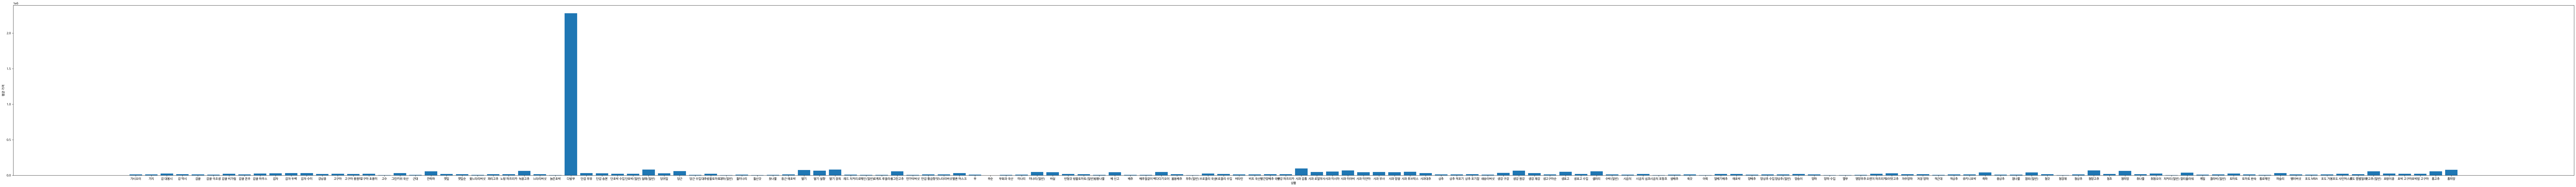

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.figure(figsize=(150,10))
plt.xlabel('상품')
plt.ylabel('평균 가격')
plt.bar(result_df['상품'], result_df['평균 가격'])
plt.plot()

이상치(`다발무`)가 있는 모습이고, 이를 제거하고 그래프를 다시 그린다.(그래프를 클릭하여 확인 가능)

[]

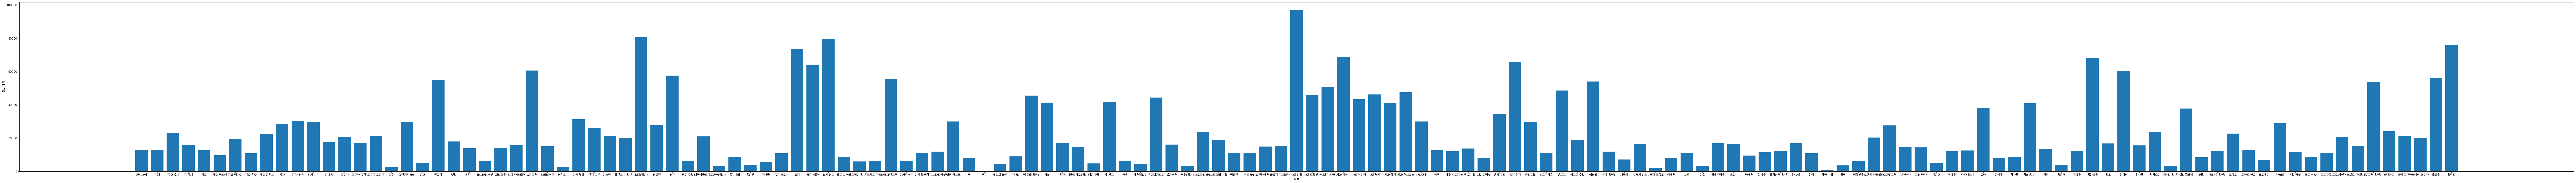

In [ ]:
df_t = result_df[result_df['상품'] != '다발무']
plt.figure(figsize=(150,10))
plt.xlabel('상품')
plt.ylabel('평균 가격')
plt.bar(df_t['상품'], df_t['평균 가격'])
plt.plot()

`평균 가격` 35000을 기준으로, 이 값보다 높으면 평균 농산물 도매 시세가 높다고 판단한다.

          상품         평균 가격
19       깐쪽파  54912.000000
25      녹광고추  60656.250000
33    달래(일반)  80631.000000
35        당근  57560.000000
43        딸기  73638.000000
44     딸기 설향  64176.000000
45     딸기 장희  79749.625000
49     롱그린고추  55715.250000
58   미나리(일반)  45579.666667
59        바실  41350.666667
63      배 신고  41870.250000
66    백다다기오이  44346.000000
75     사과 감홍  96928.000000
76   사과 로얄부사  46155.000000
77    사과 미시마  50828.000000
78    사과 미야비  68984.500000
79    사과 미얀마  43359.250000
80     사과 부사  46200.750000
81     사과 양광  41184.000000
82   사과 후브락스  47605.750000
89     생강 원강  65747.000000
92       생표고  48597.000000
94       셀러리  53990.666667
119       쪽파  38184.000000
122   참외(일반)  40932.000000
126     청양고추  68034.000000
128      청피망  60382.250000
132    칼리플라워  37729.666667
144  풋고추(일반)  53713.500000
148      홍고추  56094.750000
149      홍피망  76130.750000


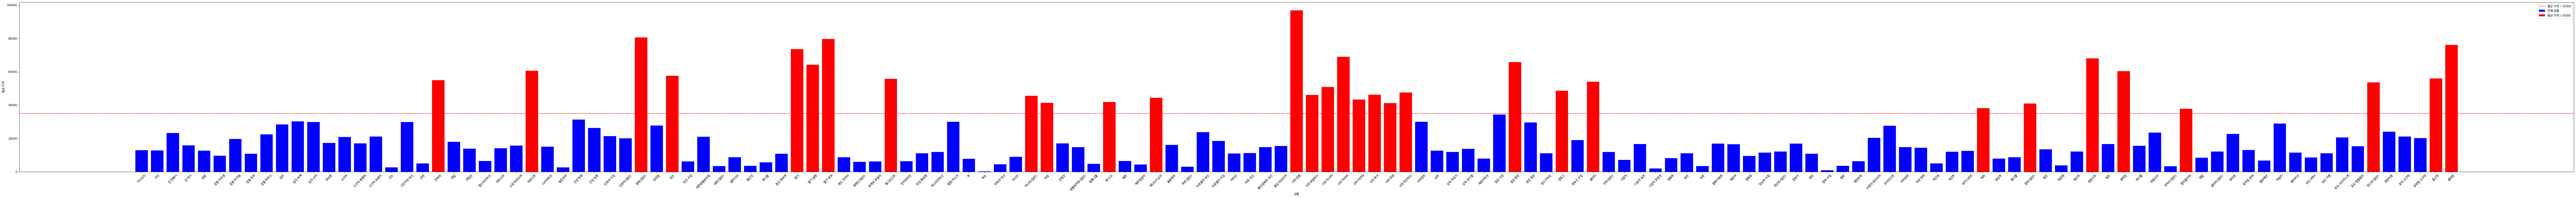

In [ ]:
# '평균 가격'이 35000 이상인 행을 추출
filtered_df = df_t[df_t['평균 가격'] > 35000]
print(filtered_df)

# 그래프 그리기
plt.figure(figsize=(150, 10))

# 전체 상품에 대한 바 그래프
plt.bar(df_t['상품'], df_t['평균 가격'], color='blue', label='전체 상품')

# '평균 가격'이 35000 이상인 상품을 붉은색으로 강조하여 표시
plt.bar(filtered_df['상품'], filtered_df['평균 가격'], color='red', label='평균 가격 > 35000')

# 35000인 빨간 줄 추가
plt.axhline(y=35000, color='red', linestyle='--', label='평균 가격 = 35000')

plt.xlabel('상품')
plt.ylabel('평균 가격')
plt.legend()
plt.xticks(rotation=45)
plt.show()

▷**비교적 재배가 쉬운 작물** = 상추, 근대, 시금치, 열무, 총각무, 가지, 엇갈이배추, 쑥갓, 고구마, 감자, 옥수수, 야콘 등

▷**난이도가 보통인 작물** = 김장배추, 김장무, 방울토마토, 호박, 토란, 여주, 봄무, 봄배추, 브로콜리, 피망, 파프리카, 당근, 생강, 콩류 등.

▷**재배하기 어려운 작물** = 일반 토마토, 고추, 오이, 참외, 수박, 멜론 등.

```
출처 : 매일신문
```